In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [2]:
# import some data to play with
irisData = datasets.load_iris()
irisData.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
# we only take the first two features for learning purpose
X = irisData.data[:, :2]
y = irisData.target

In [4]:
n_neighbors = 15

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. <br>
This can be accomplished through the weights keyword. <br>
The default value, **weights = 'uniform'**, assigns uniform weights to each neighbor. <br>
**weights = 'distance'** assigns weights proportional to the inverse of the distance from the query point.

KNN classifier accuracy - "uniform" - 0.807
KNN classifier accuracy - "distance" - 0.927


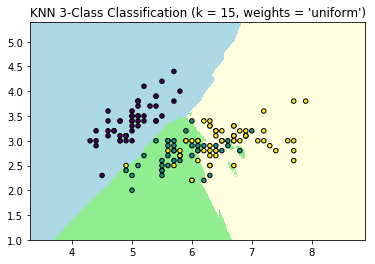

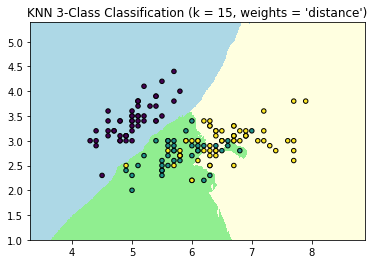

In [5]:
step = .01  # step size in the mesh

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    classifier = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    classifier.fit(X, y)
    
    print('KNN classifier accuracy - "%s" - %.3f' % (weights,classifier.score(X,y)))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, step = step),
                         np.arange(y_min, y_max, step = step))
    Z = classifier.predict(np.c_[x_grid.ravel(), y_grid.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(x_grid.shape)
    plt.figure()
    plt.pcolormesh(x_grid, y_grid, Z, cmap=ListedColormap(['lightblue', 'lightgreen', 'lightyellow']) )

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, 
                edgecolor='k', s=20)
    plt.xlim(x_grid.min(), x_grid.max())
    plt.ylim(y_grid.min(), y_grid.max())
    plt.title("KNN 3-Class Classification (k = %d, weights = '%s')"
              % (n_neighbors, weights))


plt.show()

### Visualization - Detailed

In [6]:
weights ='uniform'
# we create an instance of Neighbours Classifier and fit the data.
classifier = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
classifier.fit(X, y)

print('KNN classifier accuracy - "%s" - %.3f' % (weights,classifier.score(X,y)))

KNN classifier accuracy - "uniform" - 0.807


In [7]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [8]:
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, step = step),
                     np.arange(y_min, y_max, step = step))

x_grid

array([[3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89],
       [3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89],
       [3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89],
       ...,
       [3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89],
       [3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89],
       [3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89]])

In [9]:
y_grid

array([[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.01, 1.01, 1.01, ..., 1.01, 1.01, 1.01],
       [1.02, 1.02, 1.02, ..., 1.02, 1.02, 1.02],
       ...,
       [5.37, 5.37, 5.37, ..., 5.37, 5.37, 5.37],
       [5.38, 5.38, 5.38, ..., 5.38, 5.38, 5.38],
       [5.39, 5.39, 5.39, ..., 5.39, 5.39, 5.39]])

In [10]:
Z = classifier.predict(np.array([x_grid.ravel(), y_grid.ravel()]).T).reshape(x_grid.shape)

In [11]:
np.array([x_grid.ravel(), y_grid.ravel()])

array([[3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89],
       [1.  , 1.  , 1.  , ..., 5.39, 5.39, 5.39]])

In [12]:
np.array([x_grid.ravel(), y_grid.ravel()]).T

array([[3.3 , 1.  ],
       [3.31, 1.  ],
       [3.32, 1.  ],
       ...,
       [8.87, 5.39],
       [8.88, 5.39],
       [8.89, 5.39]])

In [13]:
classifier.predict(np.array([x_grid.ravel(), y_grid.ravel()]).T)

array([0, 0, 0, ..., 2, 2, 2])

In [14]:
classifier.predict(np.array([x_grid.ravel(), y_grid.ravel()]).T).reshape(x_grid.shape)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

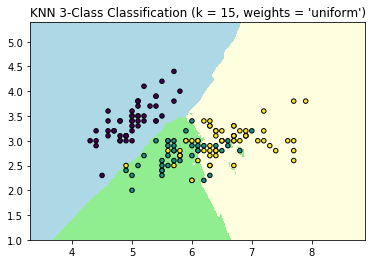

In [15]:
plt.figure()
plt.contourf(x_grid, y_grid, Z, cmap=ListedColormap(['lightblue', 'lightgreen', 'lightyellow']) )

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, 
            edgecolor='k', s=20)
plt.xlim(x_grid.min(), x_grid.max())
plt.ylim(y_grid.min(), y_grid.max())
plt.title("KNN 3-Class Classification (k = %d, weights = '%s')"
          % (n_neighbors, weights))
plt.show()